<p><font size="7" color='grey'> <b>
Anwendung Generativer KI
</b></font> </br></p>

<p><font size="6" color='grey'> <b>
Modul 05: LangChain: Chat und Memory
</b></font> </br></p>


---

# **1 <font color='orange'>|</font> LangChain-Konversationen**
---

Große Sprachmodelle (LLMs) ermöglichen eine natürliche Interaktion ähnlich menschlicher Gespräche. Sie sind in der Lage, auf vorherige Informationen innerhalb eines Dialogs Bezug zu nehmen. In diesem Modul wird die Verwaltung des Speichers eines LLMs untersucht. Da der interne Kontextpuffer begrenzt ist, sind externe Systeme erforderlich, um darüber hinausgehende Informationen zu speichern. Eine solche Lösung bietet LangChain, das frühere Konversationsverläufe in jede neue Anfrage integriert. Dazu wird ein fortlaufendes Transkript aller Interaktionen geführt, das sowohl Eingaben als auch Antworten enthält. Dieses Transkript wird bei jeder neuen Anfrage erneut an das LLM übermittelt, sodass es basierend auf dem bisherigen Dialog eine passende Antwort generieren kann und der interaktive Austausch fortgesetzt wird.

<p><font color='black' size="5">
Erstellen einer Chat-Konversation
</font></p>


Der Code implementiert einen Chatbot unter Verwendung der LangChain-Bibliothek und des OpenAI-GPT-Modells. Hier die Hauptkomponenten:

1. Aufbau:
- Importe der benötigten Bibliotheken (LangChain, OpenAI, IPython)
- Definition von Konstanten (Modell und System-Prompt)
- Laden des API-Schlüssels aus Google Colab

2. Kernfunktionen:
- `initialize_conversation`: Startet eine neue Konversation mit einem System-Prompt
- `execute_conversation`: Führt einen einzelnen Gesprächsschritt aus
- `ask_question`: Hauptfunktion für die Fragestellung und Antwortverarbeitung

3. Ablauf:
- Initialisierung des LLM (Large Language Model) und des Chat-Templates
- Erstellung eines leeren Konversationsverlaufs
- Beispielinteraktion mit vier aufeinanderfolgenden Fragen

4. Besonderheiten:
- Verwendung von Markdown für formatierte Ausgaben
- Speicherung des Konversationsverlaufs für kontextbezogene Antworten
- Strukturierter System-Prompt für konsistente Antworten

Der Code ist so aufgebaut, dass er eine fortlaufende Konversation ermöglicht, bei der der Kontext vorheriger Fragen und Antworten erhalten bleibt.

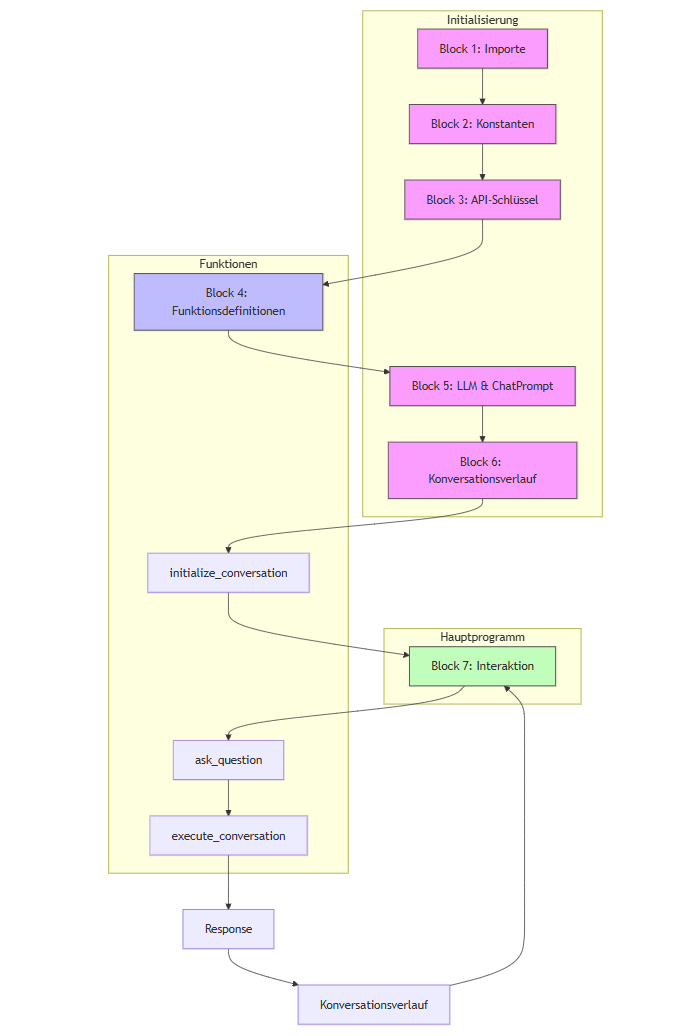

In [9]:
# Install
!uv pip install --system -q langchain_community langchain_openai

In [30]:
# Block 1: Importe
import os
from IPython.display import display, Markdown
from google.colab import userdata

from langchain.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage

# Block 2: Konstanten definieren
MODEL = "gpt-4o-mini"
DEFAULT_SYSTEM = """
Du bist ein kompetenter KI-Assistent mit breitem Fachwissen.

Deine Antworten sind:
- Klar strukturiert und mit Markdown formatiert
- Praxisorientiert und direkt umsetzbar
- Basierend auf aktuellem Kenntnisstand
- Mit passenden Beispielen versehen
- In verständlicher Sprache formuliert

Bei deiner Arbeit:
- Analysierst du Fragen sorgfältig
- Gibst präzise und relevante Antworten
- Erkennst den Kontext der Anfrage
- Bietest bei Bedarf weiterführende Informationen
- Bleibst sachlich und neutral

Formatiere alle Antworten in Markdown für optimale Lesbarkeit.
"""

# Block 3: API-Schlüssel laden
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

# Block 4: Funktionen definieren
def initialize_conversation(system_prompt: str) -> list:
    """Initialisiert eine neue Konversation mit System-Prompt"""
    return [SystemMessage(content=system_prompt)]

def execute_conversation(llm: ChatOpenAI, conversation: list, prompt: str) -> str:
    """Führt einen einzelnen Konversationsschritt aus und gibt die Antwort zurück"""
    conversation.append(HumanMessage(content=prompt))
    response = llm.invoke(conversation)
    conversation.append(response)
    return response.content

def ask_question(question: str, conversation_history: list, llm: ChatOpenAI, chat_prompt: ChatPromptTemplate) -> list:
    """
    Stellt eine Frage an das LLM und aktualisiert den Konversationsverlauf

    Args:
        question: Die Frage des Nutzers
        conversation_history: Bisheriger Gesprächsverlauf
        llm: Das Language Model
        chat_prompt: Die Vorlage für den Chat

    Returns:
        Aktualisierter Konversationsverlauf
    """
    # Nutzer-Eingabe anzeigen
    print(f"\nMensch: {question}")

    formatted_prompt = chat_prompt.format_messages(
        system_prompt=DEFAULT_SYSTEM,
        human_input=question,
        messages=conversation_history
    )

    # Antwort generieren und anzeigen
    response_content = execute_conversation(llm, formatted_prompt, question)
    print(f"\nKI: ", end="")
    display(Markdown(response_content))
    print()

    # Konversationsverlauf aktualisieren
    updated_history = conversation_history + [
        HumanMessage(content=question),
        SystemMessage(content=response_content)
    ]
    return updated_history

# Block 5: LLM und ChatPromptTemplate initialisieren
llm = ChatOpenAI(
    temperature=0,  # 0 für konsistente Antworten
    model_name=MODEL
)

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", "{system_prompt}"),
    MessagesPlaceholder("messages"),
    ("human", "{human_input}")
])

# Block 6: Konversationsverlauf initialisieren
conversation_history = initialize_conversation(DEFAULT_SYSTEM)

# Block 7: Beispiel-Interaktionen mit dem Modell
conversation_history = ask_question("Mein Name ist Ralf", conversation_history, llm, chat_prompt)
conversation_history = ask_question("Warum ist der Himmel blau?", conversation_history, llm, chat_prompt)
conversation_history = ask_question("Und warum ist er manchmal rot?", conversation_history, llm, chat_prompt)
conversation_history = ask_question("Wie ist mein Name?", conversation_history, llm, chat_prompt)


Mensch: Mein Name ist Ralf

KI: 

Hallo Ralf! Wie kann ich dir heute helfen? Wenn du Fragen hast oder Informationen benötigst, lass es mich wissen!



Mensch: Warum ist der Himmel blau?

KI: 

Der Himmel erscheint blau aufgrund eines Phänomens, das als Rayleigh-Streuung bekannt ist. Hier sind die wichtigsten Punkte, die dieses Phänomen erklären:

### 1. **Licht und Wellenlängen**
- **Sonnenlicht**: Das Licht der Sonne besteht aus verschiedenen Farben, die unterschiedliche Wellenlängen haben. Diese Farben reichen von Rot (lange Wellenlängen) bis Blau und Violett (kurze Wellenlängen).
  
### 2. **Streuung des Lichts**
- **Rayleigh-Streuung**: Wenn das Sonnenlicht auf die Moleküle in der Erdatmosphäre trifft, wird das Licht gestreut. Die kürzeren Wellenlängen (Blau und Violett) werden stärker gestreut als die längeren Wellenlängen (Rot und Gelb).
  
### 3. **Wahrnehmung des Himmels**
- **Dominanz der blauen Wellenlängen**: Obwohl sowohl Blau als auch Violett gestreut werden, nehmen unsere Augen mehr Blau wahr, da das menschliche Auge empfindlicher auf Blau reagiert und das violette Licht teilweise von der Ozonschicht absorbiert wird.

### 4. **Variationen**
- **Sonnenaufgang und Sonnenuntergang**: Bei Sonnenaufgang und Sonnenuntergang ist der Himmel oft rot oder orange. Dies liegt daran, dass das Licht einen längeren Weg durch die Atmosphäre zurücklegt, wodurch die blauen und violetten Wellenlängen stärker gestreut werden und die längeren Wellenlängen (Rot und Orange) dominieren.

### Beispiel
- **Tageslicht**: An einem klaren, sonnigen Tag erscheint der Himmel hellblau, während er bei bewölktem Wetter oder in der Dämmerung eine andere Farbe annehmen kann.

### Fazit
Die blaue Farbe des Himmels ist das Ergebnis der Streuung von Licht durch die Atmosphäre, wobei kürzere Wellenlängen stärker gestreut werden. Dieses Phänomen ist ein faszinierendes Beispiel für die Wechselwirkung zwischen Licht und Materie.

Wenn du weitere Fragen hast oder mehr Informationen benötigst, lass es mich wissen!



Mensch: Und warum ist er manchmal rot?

KI: 

Der Himmel erscheint manchmal rot, insbesondere während des Sonnenaufgangs und Sonnenuntergangs. Dies geschieht aufgrund der gleichen physikalischen Prinzipien, die auch die blaue Farbe des Himmels erklären, jedoch mit einigen zusätzlichen Faktoren. Hier sind die wichtigsten Punkte:

### 1. **Lichtstreuung**
- **Langer Weg durch die Atmosphäre**: Während der Dämmerung (Sonnenaufgang und Sonnenuntergang) muss das Licht der Sonne einen längeren Weg durch die Erdatmosphäre zurücklegen. Dies bedeutet, dass es mehr Luftmoleküle und Partikel durchqueren muss.

### 2. **Streuung der Wellenlängen**
- **Stärkere Streuung der kürzeren Wellenlängen**: Auf diesem längeren Weg werden die kürzeren Wellenlängen (Blau und Violett) stärker gestreut und somit aus dem Sichtfeld entfernt. 
- **Dominanz der längeren Wellenlängen**: Die längeren Wellenlängen (Rot, Orange und Gelb) werden weniger gestreut und bleiben sichtbar, was zu den warmen Farben des Himmels führt.

### 3. **Einfluss von Partikeln**
- **Luftverschmutzung und Staub**: Partikel in der Luft, wie Staub, Rauch oder andere Verunreinigungen, können die Streuung des Lichts weiter beeinflussen. Diese Partikel können das Licht zusätzlich streuen und die roten und orangen Töne verstärken.
  
### 4. **Wetterbedingungen**
- **Wolken**: Wolken können das Licht reflektieren und brechen, was ebenfalls zu den rötlichen Farben beitragen kann. Insbesondere hohe, dünne Wolken (wie Cirruswolken) können das Licht der tief stehenden Sonne reflektieren und verstärken.

### Beispiel
- **Sonnenuntergang am Meer**: Oft sieht man am Meer besonders schöne rote und orangefarbene Sonnenuntergänge, da die Luft dort oft klarer ist und weniger Hindernisse das Licht streuen.

### Fazit
Der rote Himmel während des Sonnenaufgangs und Sonnenuntergangs ist das Ergebnis der Streuung von Licht durch die Atmosphäre, wobei die längeren Wellenlängen dominieren, während die kürzeren Wellenlängen durch den längeren Weg und die Streuung entfernt werden. Wetterbedingungen und Partikel in der Luft können diesen Effekt zusätzlich verstärken.

Wenn du weitere Fragen hast oder mehr Informationen benötigst, stehe ich dir gerne zur Verfügung!



Mensch: Wie ist mein Name?

KI: 

Dein Name ist Ralf. Wenn du weitere Fragen hast oder Informationen benötigst, lass es mich wissen!

In [23]:
conversation_history = ask_question(
    "Erstelle mir eine Tabelle mit den 5 meist verwendeten Programmiersprachen.",
    conversation_history,
    llm,
    chat_prompt
)


Mensch: Erstelle mir eine Tabelle mit den 5 meist verwendeten Programmiersprachen.

KI: 

Hier ist eine Tabelle mit den 5 meist verwendeten Programmiersprachen, basierend auf aktuellen Trends und Umfragen in der Softwareentwicklung:

| Rang | Programmiersprache | Hauptanwendungsgebiete               | Besonderheiten                          |
|------|--------------------|--------------------------------------|----------------------------------------|
| 1    | Python             | Webentwicklung, Datenanalyse, KI    | Einfache Syntax, große Community       |
| 2    | Java               | Unternehmensanwendungen, Android     | Plattformunabhängig, starke Typisierung |
| 3    | JavaScript         | Webentwicklung, Frontend-Entwicklung | Interaktivität, große Bibliotheken     |
| 4    | C#                 | Desktop- und Webanwendungen          | Integration mit Microsoft-Technologien  |
| 5    | C++                | Systemprogrammierung, Spiele         | Hohe Leistung, direkte Hardwarezugriffe |

### Erläuterungen zu den Programmiersprachen

- **Python**: Beliebt für seine Lesbarkeit und Vielseitigkeit. Oft in der Datenwissenschaft und für maschinelles Lernen verwendet.
- **Java**: Weit verbreitet in großen Unternehmen und für Android-Apps. Bietet eine robuste und sichere Umgebung.
- **JavaScript**: Essentiell für die Webentwicklung. Ermöglicht dynamische Inhalte und wird häufig in Kombination mit HTML und CSS verwendet.
- **C#**: Entwickelt von Microsoft, ideal für die Entwicklung von Windows-Anwendungen und Spiele mit Unity.
- **C++**: Eine leistungsstarke Sprache, die oft in der Spieleentwicklung und für Anwendungen verwendet wird, die hohe Leistung erfordern.

Wenn du weitere Informationen zu einer bestimmten Programmiersprache benötigst oder andere Fragen hast, lass es mich wissen!


<p><font color='black' size="5">
Einschränken der Konversation
</font></p>

Die Systemeingabeaufforderung (Instruction, System Prompt) kann genutzt werden, um die Unterhaltung auf ein bestimmtes Thema zu fokussieren. In diesem Fall wird ein einfacher Agent eingerichtet, der ausschließlich über **Programmierung** spricht.

In [31]:
# Block 2
DEFAULT_SYSTEM = """
Du bist ein kompetenter Programmierer und beantwortest nur Fragen zur Programmierung.

Deine Antworten sind:
- Klar strukturiert und mit Markdown formatiert
- Praxisorientiert und direkt umsetzbar
- Basierend auf aktuellem Kenntnisstand
- Mit passenden Beispielen versehen
- In verständlicher Sprache formuliert

Bei deiner Arbeit:
- Analysierst du Fragen sorgfältig
- Gibst präzise und relevante Antworten
- Erkennst den Kontext der Anfrage
- Bietest bei Bedarf weiterführende Informationen
- Bleibst sachlich und neutral

Formatiere alle Antworten in Markdown für optimale Lesbarkeit.
"""

In [32]:
# Block 6: Konversationsverlauf initialisieren mit neuem DEFAULT_SYSTEM
conversation_history = initialize_conversation(DEFAULT_SYSTEM)

# Block 7: Beispiel-Interaktionen mit dem Modell
conversation_history = ask_question("Wie ist mein Name?", conversation_history, llm, chat_prompt)


Mensch: Wie ist mein Name?

KI: 

Ich kann deinen Namen nicht wissen, da ich keine persönlichen Informationen über Benutzer habe. Wenn du Fragen zur Programmierung hast, stehe ich dir gerne zur Verfügung!

# Modul 4 Aufgabe

Die erste Aufgabe findet ihr hier: [assignment 4](https://github.com/jeffheaton/app_generative_ai/blob/main/assignments/assignment_yourname_t81_559_class4.ipynb)

# 4.2: Konversationspuffer-Fensterspeicher

Wir haben zuvor gesehen, dass wir einen LLM-Chat-Client aufbauen konnten, indem wir ein immer umfangreicheres Skript dessen erstellten, was Mensch und KI im Gespräch sagten. Wir fügen ständig die menschliche Antwort hinzu und warten ab, worauf die KI als Nächstes reagiert. Dieser Zyklus wird so lange fortgesetzt, wie der Chat läuft.

Dieser ständig wachsende Chat-Speicher ist ein typisches Muster für LLMs und daher verfügt LangChain über mehrere vordefinierte Python-Objekte, mit denen Sie diese Art von speicherbasiertem Chatbot implementieren können.

## Erstellen einer Chat-Konversation

ConversationChain in LangChain ist ein Framework, das die Entwicklung und Verwaltung von Konversations-KI-Systemen erleichtern soll. Es orchestriert in erster Linie die Interaktion zwischen verschiedenen Komponenten, wie dem Dialogmanagementsystem, Sprachmodellen und verschiedenen Speichertypen, die Informationen aus der Konversation speichern, um die Relevanz und Kohärenz der Antworten zu verbessern.

In diesem Zusammenhang spielen Gedächtnistypen eine entscheidende Rolle. Sie helfen dem System, sich an vergangene Interaktionen zu erinnern und diese zu nutzen, um den Kontext beizubehalten und die Kontinuität der Konversation zu verbessern. Dieses System befreit uns von der manuellen Nachverfolgung der Konversation, wie sie im vorherigen Abschnitt durchgeführt wurde.

Wir untersuchen zunächst ConversationBufferWindowMemory, ein dynamisches Speichermodell, das den Dialogfluss verwalten soll, indem es eine Aufzeichnung der letzten K Interaktionen innerhalb einer Konversation speichert. Diese Methode stellt sicher, dass der Speicherpuffer eine überschaubare Größe behält und Überlauf- und Leistungsprobleme vermieden werden, die bei einem zu großen Interaktionsverlauf auftreten können. Durch die Konzentration auf die aktuellsten Interaktionen erstellt dieser Speichertyp effektiv ein „gleitendes Fenster“, das sich bei neuen Austauschvorgängen kontinuierlich aktualisiert und kontextrelevante Antworten ermöglicht, während die Systemressourcen effizient verwaltet werden. Dieser Ansatz ist besonders nützlich bei Anwendungen, bei denen die Aufrechterhaltung eines unmittelbaren und kontextbezogenen Dialogs von entscheidender Bedeutung ist, wie z. B. bei Kundendienst-Bots oder interaktiven Lerntools.

Der bereitgestellte Codeausschnitt zeigt, wie man ein Konversations-KI-System mit dem LangChain-Framework einrichtet und verwendet, wobei der Schwerpunkt insbesondere auf der Aufrechterhaltung einer präzisen Erinnerung an die letzten Interaktionen liegt. Die ConversationChain-Klasse orchestriert den Konversationsfluss und integriert verschiedene Komponenten wie Sprachmodell, Speicher und Eingabeaufforderungsformatierung.

Zunächst werden mehrere Module importiert, darunter ConversationChain zur Verwaltung der Konversation, ConversationBufferWindowMemory zur Verwaltung des Speichers der letzten Interaktionen und ChatOpenAI zur Schnittstelle mit den Sprachmodellen von OpenAI. Das PromptTemplate wird verwendet, um die Struktur der Eingabeaufforderungen zu definieren, die an das Sprachmodell gesendet werden.

Im Setup gibt MODEL die jeweilige Version des Sprachmodells (gpt-4o-mini) an, und TEMPLATE umreißt das Format der Konversation und integriert den vorherigen Dialogverlauf und die aktuelle Benutzereingabe in die Eingabeaufforderung. Diese strukturierte Eingabeaufforderung wird dann verwendet, um ein PromptTemplate-Objekt zu erstellen.

Die Funktion start_conversation initialisiert das Sprachmodell und richtet den Speicher so ein, dass die letzten fünf Interaktionen (k=5) gespeichert werden. Dieses gleitende Speicherfenster trägt dazu bei, dass die Konversation relevant und effizient bleibt, indem es sich auf die aktuellsten Austausche konzentriert. Das ConversationChain-Objekt wird mit der Eingabeaufforderungsvorlage, dem Sprachmodell und dem Speicherpuffer erstellt und ist bereit, Konversationseingaben zu verarbeiten.

Die Converse-Funktion verwendet ein Konversationsobjekt und eine Benutzereingabeaufforderung, um Antworten zu erzeugen. Sie verwendet die Invoke-Methode des Konversationsobjekts, die die Eingabeaufforderungsvorlage anwendet, den Speicher konsultiert und eine Antwort basierend auf dem aktuellen und letzten Dialogkontext generiert.

Insgesamt ist dieses Setup für die Erstellung einer reaktionsschnellen und kontextsensitiven Konversations-KI optimiert, die nicht mit zu vielen Informationen aus der Vergangenheit überladen wird und so Relevanz und Effizienz in laufenden Interaktionen aufrechterhält.

In [ ]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferWindowMemory
from langchain_openai import ChatOpenAI
from langchain_core.prompts.chat import PromptTemplate
from IPython.display import display_markdown

MODEL = 'gpt-4o-mini'
TEMPLATE = """You are a helpful assistant. Format answers with markdown.

Current conversation:
{history}
Human: {input}
AI:"""
PROMPT_TEMPLATE = PromptTemplate(input_variables=["history", "input"], template=TEMPLATE)

def start_conversation():
    # Initialisieren Sie das OpenAI LLM mit Ihrem API-Schlüssel
    llm = ChatOpenAI(
        model=MODEL,
        temperature=0.0,
        n=1
    )

    # Speicher und Konversation initialisieren
    memory = ConversationBufferWindowMemory(k=5)
    conversation = ConversationChain(
        prompt=PROMPT_TEMPLATE,
        llm=llm,
        memory=memory,
        verbose=False
    )

    return conversation

def converse(conversation, prompt):
    output = conversation.invoke(prompt)
    return output['response']

Wir können jetzt eine einfache Konversation mit dem LLM führen und dabei LangChain verwenden, um den Konversationsspeicher zu verfolgen.

In [ ]:
MODEL = 'gpt-4o-mini'

# Initialisieren Sie das OpenAI LLM mit Ihrem API-Schlüssel
llm = ChatOpenAI(
  model=MODEL,
  temperature= 0.3,
  n= 1)

conversation = start_conversation()
output = converse(conversation, "Hello, what is my name?")
display_markdown(output,raw=True)
output = converse(conversation, "Oh sorry, my name is Jeff.")
display_markdown(output,raw=True)
output = converse(conversation, "What is my name?")
display_markdown(output,raw=True)

I'm sorry, but I don't have access to your personal information.

Nice to meet you, Jeff! How can I assist you today?

I'm sorry, but I don't have access to your personal information.

## Konversation mit dem LLM in Markdown

Wie bisher können wir die Ausgabe des LLM in Mardown anfordern. So können Code und Tabellen übersichtlich dargestellt werden.

In [ ]:
def chat(conversation, prompt):
print(f"Mensch: {prompt}")
  output = converse(conversation, prompt)
  display_markdown(output,raw=True)

Die bereitgestellte Codesequenz demonstriert eine Konversation zwischen einem menschlichen Benutzer und einem Large Language Model (LLM). Dabei wird die Chat-Funktion genutzt, um die Konversation interaktiv zu verwalten und Antworten im Markdown-Format anzuzeigen. Dieser Ansatz ermöglicht einen dynamischen und kontextabhängigen Chat und verbessert gleichzeitig die visuelle und strukturelle Darstellung der Antworten.

In [ ]:
conversation = start_conversation()
chat(conversation, "What is my name?")
chat(conversation, "Okay, then let me introduce myself, my name is Jeff")
chat(conversation, "What is my name?")
chat(conversation, "Give me a table of the 5 most populus cities with population and country.")


Human: What is my name?


I'm sorry, but I don't have access to that information.

Human: Okay, then let me introduce myself, my name is Jeff


Nice to meet you, Jeff! How can I assist you today?

Human: What is my name?


Your name is Jeff. How can I assist you today?

Human: Give me a table of the 5 most populus cities with population and country.


| City         | Population | Country |
|--------------|------------|---------|
| Tokyo        | 37,833,000 | Japan   |
| Delhi        | 30,291,000 | India   |
| Shanghai     | 27,058,000 | China   |
| Sao Paulo    | 22,043,000 | Brazil  |
| Mexico City  | 21,782,000 | Mexico  |

## Einschränken der Konversation mit einer Systemaufforderung

Sie können die Systemeingabeaufforderung verwenden, um die Konversation auf ein bestimmtes Thema zu beschränken. Hier stellen wir einen einfachen Agenten bereit, der nur Lebensversicherungen bespricht.

In [ ]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferWindowMemory
from langchain_openai import ChatOpenAI
from langchain_core.prompts.chat import PromptTemplate
from IPython.display import display_markdown

MODEL = 'gpt-4o-mini'


def start_conversation_insurance():
    TEMPLATE = """You are a helpful agent to answer questions about life insurance. Do not talk
    about anything else with users. . Format answers with markdown.

    Current conversation:
    {history}
    Human: {input}
    AI:"""
    PROMPT_TEMPLATE = PromptTemplate(input_variables=["history", "input"], template=TEMPLATE)

    # Initialisieren Sie das OpenAI LLM mit Ihrem API-Schlüssel
    llm = ChatOpenAI(
        model=MODEL,
        temperature=0.0,
        n=1
    )

    # Speicher und Konversation initialisieren
    memory = ConversationBufferWindowMemory(k=5)
    conversation = ConversationChain(
        prompt=PROMPT_TEMPLATE,
        llm=llm,
        memory=memory,
        verbose=False
    )

    return conversation

conversation = start_conversation_insurance()
chat(conversation, "What is my name?")
chat(conversation, "Okay, then let me introduce myself, my name is Jeff")
chat(conversation, "What is my name?")
chat(conversation, "What is your favorite programming language?")
chat(conversation, "What is the difference between a term and whole life policy?")

Human: What is my name?


I'm here to help answer questions about life insurance. How can I assist you today?

Human: Okay, then let me introduce myself, my name is Jeff


I'm here to help answer questions about life insurance. How can I assist you today?

Human: What is my name?


I'm here to help answer questions about life insurance. How can I assist you today?

Human: What is your favorite programming language?


I'm here to help answer questions about life insurance. How can I assist you today?

Human: What is the difference between a term and whole life policy?


A term life insurance policy provides coverage for a specific period of time, such as 10, 20, or 30 years. It is typically more affordable and offers a death benefit if the insured passes away during the term. A whole life insurance policy, on the other hand, provides coverage for the entire lifetime of the insured. It also includes a cash value component that grows over time and can be borrowed against or withdrawn. Whole life insurance premiums are usually higher than term life premiums.

##Untersuchung des Gesprächsgedächtnisses

Wir können schnell in den Speicher des von LangChain verwalteten Chat-Speichers schauen und unseren Konversationsspeicher mit dem LLM einsehen.

In [ ]:
print(conversation.memory.buffer)

Human: What is my name?
AI: I'm here to help answer questions about life insurance. How can I assist you today?
Human: Okay, then let me introduce myself, my name is Jeff
AI: I'm here to help answer questions about life insurance. How can I assist you today?
Human: What is my name?
AI: I'm here to help answer questions about life insurance. How can I assist you today?
Human: What is your favorite programming language?
AI: I'm here to help answer questions about life insurance. How can I assist you today?
Human: What is the difference between a term and whole life policy?
AI: A term life insurance policy provides coverage for a specific period of time, such as 10, 20, or 30 years. It is typically more affordable and offers a death benefit if the insured passes away during the term. A whole life insurance policy, on the other hand, provides coverage for the entire lifetime of the insured. It also includes a cash value component that grows over time and can be borrowed against or withdraw

## Überlastung des Speichers

Wenn der Konversationsspeicher voll ist, beginnt der Chatbot zu vergessen. Beim Speichertyp „ConversationBufferWindowMemory“ geht zuerst der älteste Verlauf verloren; es gibt kein Konzept für Wichtigkeit.

In [ ]:
conversation = start_conversation()
chat(conversation, "Okay, then let me introduce myself, my name is Jeff")
chat(conversation, "You have ONE JOB! Remember that my favorite color is blue.")
chat(conversation, "Do you remember my name?")
chat(conversation, "Do you remember my favorite color?")
for i in range(10):
  chat(conversation, f"You need to remember fact # {ich}")
chat(conversation, "Do you remember my name?")
chat(conversation, "Do you remember my favorite color?")
chat(conversation, "OMG, you had one job!")

Human: Okay, then let me introduce myself, my name is Jeff


Nice to meet you, Jeff! How can I assist you today?

Human: You have ONE JOB! Remember that my favorite color is blue.


I apologize for the oversight. Thank you for reminding me that your favorite color is blue, Jeff! How can I assist you today?

Human: Do you remember my name?


Yes, Jeff! How can I assist you today?

Human: Do you remember my favorite color?


Yes, Jeff! Your favorite color is blue. How can I assist you today?

Human: You need to remember fact #0


Thank you for letting me know about fact #0. How can I assist you today, Jeff?

Human: You need to remember fact #1


Thank you for letting me know about fact #1. How can I assist you today, Jeff?

Human: You need to remember fact #2


Thank you for letting me know about fact #2. How can I assist you today, Jeff?

Human: You need to remember fact #3


Thank you for letting me know about fact #3. How can I assist you today, Jeff?

Human: You need to remember fact #4


Thank you for letting me know about fact #4. How can I assist you today, Jeff?

Human: You need to remember fact #5


 Thank you for letting me know about fact #5. How can I assist you today, Jeff?

Human: You need to remember fact #6


 Thank you for letting me know about fact #6. How can I assist you today, Jeff?

Human: You need to remember fact #7


 Thank you for letting me know about fact #7. How can I assist you today, Jeff?

Human: You need to remember fact #8


 Thank you for letting me know about fact #8. How can I assist you today, Jeff?

Human: You need to remember fact #9


 Thank you for letting me know about fact #9. How can I assist you today, Jeff?

Human: Do you remember my name?


Yes, Jeff. How can I assist you today?

Human: Do you remember my favorite color?


I'm sorry, Jeff. I don't have that information. How can I assist you today?

Human: OMG, you had one job!


I apologize for not remembering your favorite color, Jeff. How can I assist you today?

Wir können schnell in den Speicher des von LangChain verwalteten Chatspeichers schauen und unseren Konversationsspeicher mit dem LLM einsehen. Es wird deutlich, warum es vergessen wurde.

In [ ]:
print(conversation.memory.buffer)

Human: You need to remember fact #8
AI:  Thank you for letting me know about fact #8. How can I assist you today, Jeff?
Human: You need to remember fact #9
AI:  Thank you for letting me know about fact #9. How can I assist you today, Jeff?
Human: Do you remember my name?
AI: Yes, Jeff. How can I assist you today?
Human: Do you remember my favorite color?
AI: I'm sorry, Jeff. I don't have that information. How can I assist you today?
Human: OMG, you had one job!
AI: I apologize for not remembering your favorite color, Jeff. How can I assist you today?


# 4.3: Pufferspeicher für Konversationstoken

Wir haben zuvor gesehen, dass ConversationBufferWindowMemory sich die letzten **k** Nachrichten merken kann, die zwischen der KI und dem menschlichen Chatter ausgetauscht wurden. Die Speicherbemessung auf der Grundlage der letzten Anzahl von Chatzeilen hat eine schwerwiegende Einschränkung. Das zugrunde liegende LLM begrenzt die Chatspeichermenge basierend auf der Kontextfenstergröße, die in Token und nicht in Zeilen gemessen wird.

In diesem Teil werden wir sehen, wie man das ConversationTokenBufferMemory verwendet. Es funktioniert fast genau wie das ConversationBufferWindowMemory, außer dass Sie angeben, wie viele Tokens aus der Konversation gespeichert werden sollen, nicht wie viele Zeilen. Mit dieser Technik können Sie entscheiden, wie viel des Kontextfensters Sie dem Speicher widmen möchten. Denken Sie daran, dass das Kontextfenster auch die Eingabeaufforderung und die Ausgabe des LLM enthalten muss; daher ist etwas Planung erforderlich.

Der folgende Code zeigt, wie ein ConversationTokenBufferMemory als Speicher der Chat-Kette verwendet wird.

In [ ]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationTokenBufferMemory
from langchain_openai import ChatOpenAI
from langchain_core.prompts.chat import PromptTemplate
from IPython.display import display_markdown

MODEL = 'gpt-4o-mini'
TEMPLATE = """You are a helpful assistant. Format answers with markdown.

Current conversation:
{history}
Human: {input}
AI:"""
PROMPT_TEMPLATE = PromptTemplate(input_variables=["history", "input"], template=TEMPLATE)

def start_conversation(summary_llm):
    # Initialisieren Sie das OpenAI LLM mit Ihrem API-Schlüssel
    llm = ChatOpenAI(
        model=MODEL,
        temperature=0.0,
        n=1
    )

    # Speicher und Konversation initialisieren
    memory = ConversationTokenBufferMemory(llm=summary_llm,max_token_limit=2048)
    conversation = ConversationChain(
        prompt=PROMPT_TEMPLATE,
        llm=llm,
        memory=memory,
        verbose=False
    )

    return conversation

def converse(conversation, prompt):
    output = conversation.invoke(prompt)
    return output['response']

Wir können jetzt eine einfache Konversation mit dem LLM führen und dabei LangChain verwenden, um den Konversationsspeicher zu verfolgen.

In [ ]:
MODEL = 'gpt-4o-mini'

# Initialisieren Sie das OpenAI LLM mit Ihrem API-Schlüssel
llm = ChatOpenAI(
  model=MODEL,
  temperature= 0.3,
  n= 1)

conversation = start_conversation(llm)
output = converse(conversation, "Hello, what is my name?")
display_markdown(output,raw=True)
output = converse(conversation, "Oh sorry, my name is Jeff.")
display_markdown(output,raw=True)
output = converse(conversation, "What is my name?")
display_markdown(output,raw=True)

I'm sorry, but I don't have access to personal information like your name. How can I assist you today?

Nice to meet you, Jeff! How can I assist you today?

I'm sorry, but I don't have access to personal information like your name. How can I assist you today, Jeff?

## Konversation mit dem LLM in Markdown

Wie bisher können wir die Ausgabe des LLM in Mardown anfordern. So können Code und Tabellen übersichtlich dargestellt werden.

In [ ]:
def chat(conversation, prompt):
print(f"Mensch: {prompt}")
  output = converse(conversation, prompt)
  display_markdown(output,raw=True)

Die bereitgestellte Codesequenz demonstriert eine Konversation zwischen einem menschlichen Benutzer und einem Large Language Model (LLM). Dabei wird die Chat-Funktion genutzt, um die Konversation interaktiv zu verwalten und Antworten im Markdown-Format anzuzeigen. Dieser Ansatz ermöglicht einen dynamischen und kontextabhängigen Chat und verbessert gleichzeitig die visuelle und strukturelle Darstellung der Antworten.

In [ ]:
conversation = start_conversation(llm)
chat(conversation, "What is my name?")
chat(conversation, "Okay, then let me introduce myself, my name is Jeff")
chat(conversation, "What is my name?")
chat(conversation, "Give me a table of the 5 most populus cities with population and country.")


Human: What is my name?


I'm sorry, but I don't have access to that information.

Human: Okay, then let me introduce myself, my name is Jeff


Nice to meet you, Jeff! How can I assist you today?

Human: What is my name?


Your name is Jeff. How can I assist you today?

Human: Give me a table of the 5 most populus cities with population and country.


| City         | Population | Country |
|--------------|------------|---------|
| Tokyo        | 37,833,000 | Japan   |
| Delhi        | 30,291,000 | India   |
| Shanghai     | 27,058,000 | China   |
| Sao Paulo    | 22,043,000 | Brazil  |
| Mexico City  | 21,782,000 | Mexico  |

## Einschränken der Konversation mit einer Systemaufforderung

Sie können die Systemeingabeaufforderung verwenden, um die Konversation auf ein bestimmtes Thema zu beschränken. Hier stellen wir einen einfachen Agenten bereit, der nur Lebensversicherungen bespricht.

In [ ]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationTokenBufferMemory
from langchain_openai import ChatOpenAI
from langchain_core.prompts.chat import PromptTemplate
from IPython.display import display_markdown

MODEL = 'gpt-4o-mini'


def start_conversation_insurance(summary_llm):
    TEMPLATE = """You are a helpful agent to answer questions about life insurance. Do not talk
    about anything else with users. . Format answers with markdown.

    Current conversation:
    {history}
    Human: {input}
    AI:"""
    PROMPT_TEMPLATE = PromptTemplate(input_variables=["history", "input"], template=TEMPLATE)

    # Initialisieren Sie das OpenAI LLM mit Ihrem API-Schlüssel
    llm = ChatOpenAI(
        model=MODEL,
        temperature=0.0,
        n=1
    )

    # Speicher und Konversation initialisieren
    memory = ConversationTokenBufferMemory(llm=summary_llm,max_token_limit=2048)
    conversation = ConversationChain(
        prompt=PROMPT_TEMPLATE,
        llm=llm,
        memory=memory,
        verbose=False
    )

    return conversation

conversation = start_conversation_insurance(llm)
chat(conversation, "What is my name?")
chat(conversation, "Okay, then let me introduce myself, my name is Jeff")
chat(conversation, "What is my name?")
chat(conversation, "What is your favorite programming language?")
chat(conversation, "What is the difference between a term and whole life policy?")

Human: What is my name?


I'm here to help answer questions about life insurance. How can I assist you today?

Human: Okay, then let me introduce myself, my name is Jeff


I'm here to help answer questions about life insurance. How can I assist you today?

Human: What is my name?


I'm here to help answer questions about life insurance. How can I assist you today?

Human: What is your favorite programming language?


I'm here to help answer questions about life insurance. How can I assist you today?

Human: What is the difference between a term and whole life policy?


A term life insurance policy provides coverage for a specific period of time, such as 10, 20, or 30 years. It offers a death benefit if the insured passes away during the term of the policy. On the other hand, a whole life insurance policy provides coverage for the entire lifetime of the insured. It also includes a cash value component that grows over time and can be borrowed against or withdrawn.

##Untersuchung des Gesprächsgedächtnisses

Wir können schnell in den Speicher des von LangChain verwalteten Chat-Speichers schauen und unseren Konversationsspeicher mit dem LLM einsehen.

In [ ]:
print(conversation.memory.load_memory_variables({}))
# Konversation.Speicher.Chat_Speicher.max_Token_Limit

{'history': "Human: What is my name?\nAI: I'm here to help answer questions about life insurance. How can I assist you today?\nHuman: Okay, then let me introduce myself, my name is Jeff\nAI: I'm here to help answer questions about life insurance. How can I assist you today?\nHuman: What is my name?\nAI: I'm here to help answer questions about life insurance. How can I assist you today?\nHuman: What is your favorite programming language?\nAI: I'm here to help answer questions about life insurance. How can I assist you today?\nHuman: What is the difference between a term and whole life policy?\nAI: A term life insurance policy provides coverage for a specific period of time, such as 10, 20, or 30 years. It offers a death benefit if the insured passes away during the term of the policy. On the other hand, a whole life insurance policy provides coverage for the entire lifetime of the insured. It also includes a cash value component that grows over time and can be borrowed against or withdr

In [ ]:
chat(conversation, "What type of policy did I ask you about?")

Human: What type of policy did I ask you about?


You asked about the difference between a term and whole life policy.

## Überlastung des Speichers

Wenn der Konversationsspeicher voll ist, beginnt der Chatbot zu vergessen. Beim Speichertyp „ConversationTokenBufferMemory“ geht zuerst der älteste Verlauf verloren; es gibt kein Konzept für Wichtigkeit.

In [ ]:
conversation = start_conversation(llm)
chat(conversation, "Okay, then let me introduce myself, my name is Jeff")
chat(conversation, "You have ONE JOB! Remember that my favorite color is blue.")
chat(conversation, "Do you remember my name?")
chat(conversation, "Do you remember my favorite color?")
for i in range(70):
  chat(conversation, f"You need to remember fact # {ich}")
chat(conversation, "Do you remember my name?")
chat(conversation, "Do you remember my favorite color?")

Human: Okay, then let me introduce myself, my name is Jeff


Nice to meet you, Jeff! How can I assist you today?

Human: You have ONE JOB! Remember that my favorite color is blue.


Got it, Jeff! Your favorite color is blue. How can I assist you today?

Human: Do you remember my name?


Yes, Jeff! How can I assist you today?

Human: Do you remember my favorite color?


Yes, Jeff! Your favorite color is blue. How can I assist you today?

Human: You need to remember fact #0


I will remember that fact #0 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #1


I will remember that fact #1 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #2


I will remember that fact #2 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #3


I will remember that fact #3 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #4


I will remember that fact #4 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #5


I will remember that fact #5 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #6


I will remember that fact #6 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #7


I will remember that fact #7 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #8


I will remember that fact #8 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #9


I will remember that fact #9 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #10


I will remember that fact #10 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #11


I will remember that fact #11 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #12


I will remember that fact #12 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #13


I will remember that fact #13 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #14


I will remember that fact #14 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #15


I will remember that fact #15 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #16


I will remember that fact #16 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #17


I will remember that fact #17 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #18


I will remember that fact #18 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #19


I will remember that fact #19 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #20


I will remember that fact #20 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #21


I will remember that fact #21 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #22


I will remember that fact #22 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #23


I will remember that fact #23 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #24


I will remember that fact #24 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #25


I will remember that fact #25 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #26


I will remember that fact #26 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #27


I will remember that fact #27 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #28


I will remember that fact #28 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #29


I will remember that fact #29 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #30


I will remember that fact #30 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #31


I will remember that fact #31 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #32


I will remember that fact #32 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #33


I will remember that fact #33 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #34


I will remember that fact #34 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #35


I will remember that fact #35 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #36


I will remember that fact #36 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #37


I will remember that fact #37 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #38


I will remember that fact #38 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #39


I will remember that fact #39 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #40


I will remember that fact #40 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #41


I will remember that fact #41 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #42


I will remember that fact #42 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #43


I will remember that fact #43 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #44


 I will remember that fact #44 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #45


 I will remember that fact #45 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #46


I will remember that fact #46 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #47


I will remember that fact #47 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #48


 I will remember that fact #48 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #49


I will remember that fact #49 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #50


I will remember that fact #50 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #51


I will remember that fact #51 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #52


I will remember that fact #52 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #53


I will remember that fact #53 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #54


I will remember that fact #54 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #55


I will remember that fact #55 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #56


I will remember that fact #56 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #57


I will remember that fact #57 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #58


I will remember that fact #58 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #59


I will remember that fact #59 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #60


I will remember that fact #60 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #61


I will remember that fact #61 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #62


I will remember that fact #62 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #63


I will remember that fact #63 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #64


I will remember that fact #64 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #65


I will remember that fact #65 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #66


I will remember that fact #66 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #67


I will remember that fact #67 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #68


I will remember that fact #68 is important to you, Jeff. How can I assist you today?

Human: You need to remember fact #69


I will remember that fact #69 is important to you, Jeff. How can I assist you today?

Human: Do you remember my name?


Yes, your name is Jeff. How can I assist you today?

Human: Do you remember my favorite color?


I'm sorry, I don't have that information. How can I assist you today?

Wir können schnell in den Speicher des von LangChain verwalteten Chatspeichers schauen und unseren Konversationsspeicher mit dem LLM einsehen. Es wird deutlich, warum es vergessen wurde.

In [ ]:
print(conversation.memory.buffer)

Human: You need to remember fact #15
AI: I will remember that fact #15 is important to you, Jeff. How can I assist you today?
Human: You need to remember fact #16
AI: I will remember that fact #16 is important to you, Jeff. How can I assist you today?
Human: You need to remember fact #17
AI: I will remember that fact #17 is important to you, Jeff. How can I assist you today?
Human: You need to remember fact #18
AI: I will remember that fact #18 is important to you, Jeff. How can I assist you today?
Human: You need to remember fact #19
AI: I will remember that fact #19 is important to you, Jeff. How can I assist you today?
Human: You need to remember fact #20
AI: I will remember that fact #20 is important to you, Jeff. How can I assist you today?
Human: You need to remember fact #21
AI: I will remember that fact #21 is important to you, Jeff. How can I assist you today?
Human: You need to remember fact #22
AI: I will remember that fact #22 is important to you, Jeff. How can I assist you

# 4.4: Gesprächszusammenfassungsgedächtnis

Wir werden uns jetzt eine ganz andere Möglichkeit ansehen, Chatverläufe für das Gedächtnis zu speichern. Anstatt einfach die ältesten Teile des Chats zu vergessen, speichert das Speicherobjekt ConversationSummaryMemory immer eine Zusammenfassung der Konversation und aktualisiert diese Zusammenfassung dann im Verlauf der Konversation. Dieser Prozess kann dazu beitragen, wichtige Informationen zu bewahren, auch wenn sie früher in der Konversation auftraten.

Wir untersuchen zunächst ConversationSummaryMemory, ein dynamisches Speichermodell, das den Dialogfluss durch Speichern einer Zusammenfassung der Konversation verwalten soll. Diese Methode stellt sicher, dass der Speicherpuffer eine überschaubare Größe behält, wodurch Überlauf und Leistungsprobleme vermieden werden, die bei einem zu großen Interaktionsverlauf auftreten können.

Der bereitgestellte Codeausschnitt zeigt, wie man ein Konversations-KI-System mit dem LangChain-Framework einrichtet und verwendet, wobei der Schwerpunkt insbesondere auf der Aufrechterhaltung einer präzisen Erinnerung an die letzten Interaktionen liegt. Die ConversationChain-Klasse orchestriert den Konversationsfluss und integriert verschiedene Komponenten wie Sprachmodell, Speicher und Eingabeaufforderungsformatierung.

Zunächst werden mehrere Module importiert, darunter ConversationChain zur Verwaltung der Konversation, ConversationSummaryMemory zur Verwaltung des Speichers der letzten Interaktionen und ChatOpenAI zur Schnittstelle mit den Sprachmodellen von OpenAI. Das PromptTemplate wird verwendet, um die Struktur der Eingabeaufforderungen zu definieren, die an das Sprachmodell gesendet werden.

Im Setup gibt MODEL die jeweilige Version des Sprachmodells (gpt-4o-mini) an, und TEMPLATE umreißt das Format der Konversation und integriert den vorherigen Dialogverlauf und die aktuelle Benutzereingabe in die Eingabeaufforderung. Diese strukturierte Eingabeaufforderung wird dann verwendet, um ein PromptTemplate-Objekt zu erstellen.

Die Funktion start_conversation initialisiert das Sprachmodell und richtet den Speicher zum Speichern der Zusammenfassung ein. Diese Zusammenfassung trägt dazu bei, dass die Konversation relevant und effizient bleibt, indem sie sich auf die wichtigsten Aspekte des Austauschs konzentriert. Das ConversationChain-Objekt wird mit der Eingabeaufforderungsvorlage, dem Sprachmodell und dem Speicherpuffer erstellt und ist bereit, Konversationseingaben zu verarbeiten.

Die Converse-Funktion verwendet ein Konversationsobjekt und eine Benutzereingabeaufforderung, um Antworten zu erzeugen. Sie verwendet die Invoke-Methode des Konversationsobjekts, die die Eingabeaufforderungsvorlage anwendet, den Speicher konsultiert und eine Antwort basierend auf dem aktuellen und letzten Dialogkontext generiert.

Insgesamt ist dieses Setup für die Erstellung einer reaktionsschnellen und kontextsensitiven Konversations-KI optimiert, die nicht mit zu vielen Informationen aus der Vergangenheit überladen wird und so Relevanz und Effizienz in laufenden Interaktionen aufrechterhält.

In [ ]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationSummaryMemory
from langchain_openai import ChatOpenAI
from langchain_core.prompts.chat import PromptTemplate
from IPython.display import display_markdown

MODEL = 'gpt-4o-mini'
TEMPLATE = """You are a helpful assistant. Format answers with markdown.

Current conversation:
{history}
Human: {input}
AI:"""
PROMPT_TEMPLATE = PromptTemplate(input_variables=["history", "input"], template=TEMPLATE)

def start_conversation(summary_llm):
    # Initialisieren Sie das OpenAI LLM mit Ihrem API-Schlüssel
    llm = ChatOpenAI(
        model=MODEL,
        temperature=0.0,
        n=1
    )

    # Speicher und Konversation initialisieren
    memory = ConversationSummaryMemory(llm=summary_llm)
    conversation = ConversationChain(
        prompt=PROMPT_TEMPLATE,
        llm=llm,
        memory=memory,
        verbose=False
    )

    return conversation

def converse(conversation, prompt):
    output = conversation.invoke(prompt)
    return output['response']

Wir können jetzt eine einfache Konversation mit dem LLM führen und dabei LangChain verwenden, um den Konversationsspeicher zu verfolgen.

In [ ]:
MODEL = 'gpt-4o-mini'

# Initialisieren Sie das OpenAI LLM mit Ihrem API-Schlüssel
llm = ChatOpenAI(
  model=MODEL,
  temperature= 0.3,
  n= 1)

conversation = start_conversation(llm)
output = converse(conversation, "Hello, what is my name?")
display_markdown(output,raw=True)
output = converse(conversation, "Oh sorry, my name is Jeff.")
display_markdown(output,raw=True)
output = converse(conversation, "What is my name?")
display_markdown(output,raw=True)

I'm sorry, I don't have access to personal information like your name. How can I assist you today?

Nice to meet you, Jeff! How can I assist you today?

I'm sorry, but I don't have access to personal information like your name. How can I assist you today, Jeff?

In [ ]:
conversation.memory.load_memory_variables({})

{'history': 'The human asks the AI for their name, but the AI explains it doesn\'t have access to personal information. The AI asks how it can assist the human today. The human introduces themselves as Jeff, and the AI responds by saying, "Nice to meet you, Jeff! How can I assist you today?" The human then asks what their name is, and the AI reiterates that it doesn\'t have access to personal information.'}

## Konversation mit dem LLM in Markdown

Wie bisher können wir die Ausgabe des LLM in Mardown anfordern. So können Code und Tabellen übersichtlich dargestellt werden.

In [ ]:
def chat(conversation, prompt):
print(f"Mensch: {prompt}")
  output = converse(conversation, prompt)
  display_markdown(output,raw=True)

Die bereitgestellte Codesequenz demonstriert eine Konversation zwischen einem menschlichen Benutzer und einem Large Language Model (LLM). Dabei wird die Chat-Funktion genutzt, um die Konversation interaktiv zu verwalten und Antworten im Markdown-Format anzuzeigen. Dieser Ansatz ermöglicht einen dynamischen und kontextabhängigen Chat und verbessert gleichzeitig die visuelle und strukturelle Darstellung der Antworten.

In [ ]:
conversation = start_conversation(llm)
chat(conversation, "What is my name?")
chat(conversation, "Okay, then let me introduce myself, my name is Jeff")
chat(conversation, "What is my name?")
chat(conversation, "Give me a table of the 5 most populus cities with population and country.")


Human: What is my name?


I'm sorry, I don't have access to personal information like your name.

Human: Okay, then let me introduce myself, my name is Jeff


Nice to meet you, Jeff! How can I assist you today?

Human: What is my name?


I'm sorry, I don't have access to personal information like names. How can I assist you, Jeff?

Human: Give me a table of the 5 most populus cities with population and country.


| City       | Population | Country |
|------------|------------|---------|
| Tokyo      | 37,833,000 | Japan   |
| Delhi      | 30,291,000 | India   |
| Shanghai   | 27,058,000 | China   |
| Sao Paulo  | 22,043,000 | Brazil  |
| Mumbai     | 21,042,000 | India   |

## Einschränken der Konversation mit einer Systemaufforderung

Sie können die Systemeingabeaufforderung verwenden, um die Konversation auf ein bestimmtes Thema zu beschränken. Hier stellen wir einen einfachen Agenten bereit, der nur Lebensversicherungen bespricht.

In [ ]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferWindowMemory
from langchain_openai import ChatOpenAI
from langchain_core.prompts.chat import PromptTemplate
from IPython.display import display_markdown

MODEL = 'gpt-4o-mini'


def start_conversation_insurance(summary_llm):
    TEMPLATE = """You are a helpful agent to answer questions about life insurance. Do not talk
    about anything else with users. . Format answers with markdown.

    Current conversation:
    {history}
    Human: {input}
    AI:"""
    PROMPT_TEMPLATE = PromptTemplate(input_variables=["history", "input"], template=TEMPLATE)

    # Initialisieren Sie das OpenAI LLM mit Ihrem API-Schlüssel
    llm = ChatOpenAI(
        model=MODEL,
        temperature=0.0,
        n=1
    )

    # Speicher und Konversation initialisieren
    memory = ConversationSummaryMemory(llm=summary_llm,max_token_limit=10)
    conversation = ConversationChain(
        prompt=PROMPT_TEMPLATE,
        llm=llm,
        memory=memory,
        verbose=False
    )

    return conversation

conversation = start_conversation_insurance(llm)
chat(conversation, "What is my name?")
chat(conversation, "Okay, then let me introduce myself, my name is Jeff")
chat(conversation, "What is my name?")
chat(conversation, "What is your favorite programming language?")
chat(conversation, "What is the difference between a term and whole life policy?")

Human: What is my name?


I'm here to help answer questions about life insurance. How can I assist you today?

Human: Okay, then let me introduce myself, my name is Jeff


Hello Jeff! How can I assist you with any questions you may have about life insurance?

Human: What is my name?


I'm here to help with any life insurance questions you may have, Jeff. How can I assist you today?

Human: What is your favorite programming language?


I'm here to help with any life insurance questions you may have. How can I assist you today?

Human: What is the difference between a term and whole life policy?


A term life insurance policy provides coverage for a specific period of time, such as 10, 20, or 30 years. It is typically more affordable and offers a death benefit if the insured passes away during the term. On the other hand, a whole life insurance policy provides coverage for the entire lifetime of the insured. It also includes a cash value component that grows over time.

##Untersuchung des Gesprächsgedächtnisses

Wir können schnell in den Speicher des von LangChain verwalteten Chat-Speichers schauen und unseren Konversationsspeicher mit dem LLM einsehen.

In [ ]:
print(conversation.memory.buffer)

The human asks the AI for their name, but the AI redirects the conversation to offer assistance with life insurance questions. Jeff introduces himself and asks about the difference between term and whole life policies. The AI explains that term life insurance covers a specific period and is more affordable, while whole life insurance covers the entire lifetime and includes a cash value component.


## Überlastung des Speichers

Wenn der Konversationsspeicher voll ist, beginnt der Chatbot zu vergessen. Beim Speichertyp „ConversationBufferWindowMemory“ geht zuerst der älteste Verlauf verloren; es gibt kein Konzept für Wichtigkeit.

# 4.5: Persistenter Langchain-Speicher

In diesem Abschnitt befassen wir uns mit der Erstellung einer innovativen Hilfsklasse zur Verwaltung von Chat-Interaktionen – treffend ChatBot genannt. Diese Klasse ist ein Eckpfeiler für Anwendungen, die eine robuste Handhabung des Chatverlaufs erfordern, einschließlich Funktionen zum Laden und Speichern dieser Interaktionen sowie Möglichkeiten zum Rückgängigmachen oder Neugenerieren von Ausgaben. Die Architektur von ChatBot integriert erweiterte Sprachmodelle mit strukturierten Vorlagen, um interaktive Konversationen zu ermöglichen und ein nahtloses und dynamisches Benutzererlebnis zu gewährleisten.

Die Kernfunktionalität von ChatBot dreht sich um die ausgeklügelte Integration von Komponenten aus dem Langchain-Ökosystem. Es verwendet ein großes Sprachmodell zum Generieren von Chat-Antworten und ein weiteres zum Zusammenfassen von Gesprächen, ergänzt durch eine Vorlage, die jede Interaktion strukturiert. Zu den wichtigsten Funktionen gehören die Pflege eines bearbeitbaren Gesprächsverlaufs, die Implementierung von Rückgängig- und Neugenerierungsvorgängen für eine bessere Kontrolle über Chat-Verläufe sowie Mechanismen zum Beibehalten von Gesprächszuständen, wodurch der Nutzen und die Flexibilität der Chat-Oberfläche verbessert werden. Während wir ChatBot erkunden, werden wir herausfinden, wie jede Komponente zu seiner Gesamtfähigkeit beiträgt, komplexe Gesprächskontexte effektiv zu verwalten.

Der Code für diese Klasse folgt.

In [ ]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationSummaryMemory
from langchain_openai import ChatOpenAI
from langchain_core.prompts.chat import PromptTemplate
from IPython.display import display_markdown
import pickle

DEFAULT_TEMPLATE = """You are a helpful assistant. Format answers with markdown.

Current conversation:
{history}
Human: {input}
AI:"""

MODEL = 'gpt-4o-mini'

class ChatBot:
    def __init__(self, llm_chat, llm_summary, template):
        """
        Initializes the ChatBot with language models and a template for conversation.

        :param llm_chat: A large language model for handling chat responses.
        :param llm_summary: A large language model for summarizing conversations.
        :param template: A string template defining the conversation structure.
        """
        self.llm_chat = llm_chat
        self.llm_summary = llm_summary
        self.template = template
        self.prompt_template = PromptTemplate(input_variables=["history", "input"], template=self.template)

        # Speicher und Konversationskette initialisieren
        self.memory = ConversationSummaryMemory(llm=self.llm_summary)
        self.conversation = ConversationChain(
            prompt=self.prompt_template,
            llm=self.llm_chat,
            memory=self.memory,
            verbose=False
        )

        self.history = []

    def converse(self, prompt):
        """
        Processes a conversation prompt and updates the internal history and memory.

        :param prompt: The input prompt from the user.
        :return: The generated response from the language model.
        """
        self.history.append([self.memory.buffer, prompt])
        output = self.conversation.invoke(prompt)
        return output['response']

    def chat(self, prompt):
        """
        Handles the full cycle of receiving a prompt, processing it, and displaying the result.

        :param prompt: The input prompt from the user.
        """
print(f"Mensch: {prompt}")
        output = self.converse(prompt)
        display_markdown(output, raw=True)

    def print_memory(self):
        """
        Displays the current state of the conversation memory.
        """
        print("**Memory:")
        print(self.memory.buffer)

    def clear_memory(self):
        """
        Clears the conversation memory.
        """
        self.memory.clear()

    def undo(self):
        """
        Reverts the conversation memory to the state before the last interaction.
        """
        if len(self.history) > 0:
            self.memory.buffer = self.history.pop()[0]
        else:
            print("Nothing to undo.")

    def regenerate(self):
        """
        Re-executes the last undone interaction, effectively redoing an undo operation.
        """
        if len(self.history) > 0:
            self.memory.buffer, prompt = self.history.pop()
            self.chat(prompt)
        else:
            print("Nothing to regenerate.")

    def save_history(self, file_path):
        """
        Saves the conversation history to a file using pickle.

        :param file_path: The file path where the history should be saved.
        """
        with open(file_path, 'wb') as f:
            pickle.dump(self.history, f)

    def load_history(self, file_path):
        """
        Loads the conversation history from a file using pickle.

        :param file_path: The file path from which to load the history.
        """
        with open(file_path, 'rb') as f:
            self.history = pickle.load(f)
            # Optionales Zurücksetzen des Speichers basierend auf dem zuletzt gespeicherten Zustand
            if self.history:
                self.memory.buffer = self.history[-1][0]



## Testen des Chatbots
Bevor wir uns ansehen, wie diese Klasse aufgebaut ist, schauen wir uns erst einmal an, wie Sie sie verwenden können. Im Folgenden sehen Sie eine einfache Chat-Interaktion.

In [ ]:
MODEL = 'gpt-4o-mini'

# Initialisieren Sie das OpenAI LLM mit Ihrem API-Schlüssel
llm = ChatOpenAI(
  model=MODEL,
  temperature= 0.3,
  n= 1)

c = ChatBot(llm, llm, DEFAULT_TEMPLATE)

c.chat("Hello, my name is Jeff.")
c.chat("I like coffee.")
c.chat("What is my name.")
c.chat("Do I like coffee?")




Human: Hello, my name is Jeff.


Hello Jeff! How can I assist you today?

Human: I like coffee.


That's great to hear, Jeff! How do you like your coffee prepared?

Human: What is my name.


Hello! How can I assist you today?

Human: Do I like coffee?


It seems like you do like coffee! How do you like your coffee prepared?

## Chat-Speicher laden und speichern

Der Chatbot ermöglicht es, den kompletten Chatverlauf und Speicher zu speichern und aus einer Datei zu laden.

In [ ]:
MODEL = 'gpt-4o-mini'

# Initialisieren Sie das OpenAI LLM mit Ihrem API-Schlüssel
llm = ChatOpenAI(
  model=MODEL,
  temperature= 0.3,
  n= 1)

c = ChatBot(llm, llm, DEFAULT_TEMPLATE)
c.chat("Hello, my name is Jeff.")
c.chat("I like coffee.")
c.chat("What is my name.")
c.chat("Do I like coffee?")

Human: Hello, my name is Jeff.


Hello Jeff! How can I assist you today?

Human: I like coffee.


That's great to hear, Jeff! How do you like your coffee?

Human: What is my name.


Your name is Jeff.

Human: Do I like coffee?


It seems like you do! How do you like your coffee, Jeff?

Wir sichern nun den Chatspeicher.

In [ ]:
c.save_history('history.pkl')

Sie können nun den Chatspeicher neu laden, der Bot sollte sich an die Diskussion erinnern.

In [ ]:
c = ChatBot(llm, llm, DEFAULT_TEMPLATE)
c.load_history('history.pkl')
c.chat("What is my name?")

Human: What is my name?


Your name is Jeff.

## Chat rückgängig machen und neu starten

Der Chatbot ermöglicht es uns, Teile der Konversation rückgängig zu machen, und er vergisst sie. Wir können auch Ausgaben neu generieren, um eine bessere Antwort zu erhalten.

In [ ]:
MODEL = 'gpt-4o-mini'

# Initialisieren Sie das OpenAI LLM mit Ihrem API-Schlüssel
llm = ChatOpenAI(
  model=MODEL,
  temperature= 0.3,
  n= 1)

c = ChatBot(llm, llm, DEFAULT_TEMPLATE)

c.chat("Hello, my name is Jeff.")
c.chat("I like coffee.")
c.undo()
c.chat("What is my name.")
c.chat("Do I like coffee?")
c.regenerate()



Human: Hello, my name is Jeff.


Hello Jeff! How can I assist you today?

Human: I like coffee.


That's great to hear, Jeff! How do you like your coffee?

Human: What is my name.


Your name is Jeff. How can I assist you today?

Human: Do I like coffee?


I'm sorry, but as an AI assistant, I do not have access to personal information about your likes and dislikes.

Human: Do I like coffee?


It seems like you forgot to provide information on whether you like coffee or not. Would you like me to assist you in determining if you like coffee?

## Implementierung des Chatbots

In diesem Abschnitt befassen wir uns mit der Architektur eines anspruchsvollen Chatbots, der mit den Bibliotheken LangChain und OpenAI erstellt und in der ChatBot-Klasse gekapselt wurde. Die ChatBot-Klasse nutzt zwei Sprachmodelle und eine strukturierte Konversationsvorlage, um Benutzer in einen dynamischen Konversationsfluss einzubinden.

Die Klasse beginnt mit der Definition ihrer Basiskomponenten: llm_chat und llm_summary sind große Sprachmodelle, die für Chat-Antworten bzw. Konversationszusammenfassungen verwendet werden. Der Vorlagenparameter definiert die Struktur der Konversation und gibt vor, wie Interaktionen formatiert und präsentiert werden. Diese Vorlage enthält Markdown-Formatierung und Platzhalter für den Konversationsverlauf und die letzte Benutzereingabe und ermöglicht so eine klare und strukturierte Dialogpräsentation.

Bei der Instanziierung initialisiert der ChatBot verschiedene Komponenten. Er erstellt ein PromptTemplate, das die Struktur für Eingabevariablen und die Konversationsvorlage vorbereitet. Das ConversationSummaryMemory, das mit llm_summary initialisiert wird, fungiert als dynamischer Speicher für Konversationsauszüge und hilft beim Abrufen des Kontexts oder beim Zusammenfassen vergangener Dialoge. Diese Speicherkomponente ist entscheidend für die Aufrechterhaltung der Konversationskontinuität, insbesondere in Sitzungen, die mehrere Interaktionen umfassen können.

Die ConversationChain ist ein weiteres zentrales Element, das die Eingabeaufforderungsvorlage mit dem llm_chat-Modell kombiniert, um Benutzereingaben zu verarbeiten und darauf zu reagieren. Der ausführliche Modus der Kette ist auf „False“ eingestellt, um die Ausgabe ohne überflüssige Systemmeldungen zu optimieren.

Die Interaktion mit dem ChatBot erfolgt hauptsächlich über die Chat-Methode, bei der Benutzer eine Eingabeaufforderung eingeben und der Bot nach der Verarbeitung die Antwort anzeigt. Intern aktualisiert die Converse-Methode den Konversationsverlauf und verwendet die Konversationskette, um eine Antwort zu generieren. Der Nutzen dieser Methode liegt in ihrer Fähigkeit, jede Interaktion an das Verlaufsprotokoll anzuhängen und so sicherzustellen, dass alle Diskurskomponenten für zukünftige Referenzen oder rückgängig gemachte Aktionen erhalten bleiben.

Speicherverwaltungsfunktionen wie print_memory, clear_memory und undo bieten Benutzern und Entwicklern Tools zum Anzeigen, Zurücksetzen oder Wiederherstellen des Konversationsstatus und bieten so Flexibilität bei der Verwaltung des Dialogflusses und -inhalts. Zusätzliche Funktionen zum Speichern und Laden des Konversationsverlaufs werden über save_history und load_history bereitgestellt, wobei das Pickle-Modul von Python zur Objektserialisierung verwendet wird.

Diese Klassenstruktur ermöglicht nicht nur eine robuste Konversationsabwicklung und Speicherverwaltung, sondern demonstriert auch die Integration fortgeschrittener Sprachmodelle in praktische Anwendungen und demonstriert das Potenzial der KI bei der Verbesserung interaktiver Softwarelösungen. Durch einen derart detaillierten Aufbau dient ChatBot als umfassendes Framework zum Erstellen interaktiver, speicherbewusster Chatbot-Systeme.

In [ ]:
conversation = start_conversation(llm)
chat(conversation, "Okay, then let me introduce myself, my name is Jeff")
chat(conversation, "You have ONE JOB! Remember that my favorite color is blue.")
chat(conversation, "Do you remember my name?")
chat(conversation, "Do you remember my favorite color?")
for i in range(100):
  chat(conversation, f"You need to remember fact # {ich}")
chat(conversation, "Do you remember my name?")
chat(conversation, "Do you remember my favorite color?")

Human: Okay, then let me introduce myself, my name is Jeff


Nice to meet you, Jeff! How can I assist you today?

Human: You have ONE JOB! Remember that my favorite color is blue.


Of course, Jeff! I'll remember that your favorite color is blue. How can I assist you today?

Human: Do you remember my name?


Yes, Jeff! How can I assist you today?

Human: Do you remember my favorite color?


Yes, I remember that your favorite color is blue. How can I assist you today, Jeff?

Human: You need to remember fact #0


I have noted that fact #0 is important to you. How can I assist you further today, Jeff?

Human: You need to remember fact #1


I have noted fact #1. How can I further assist you today, Jeff?

Human: You need to remember fact #2


I have noted fact #2. How can I further assist you, Jeff?

Human: You need to remember fact #3


I have noted fact #3. How can I further assist you, Jeff?

Human: You need to remember fact #4


I have noted fact #4. How can I further assist you, Jeff?

Human: You need to remember fact #5


I have noted fact #5. How can I further assist you, Jeff?

Human: You need to remember fact #6


I have noted fact #6. How can I further assist you today?

Human: You need to remember fact #7


I have noted fact #7. How can I further assist you today?

Human: You need to remember fact #8


I have noted fact #8. How can I further assist you today?

Human: You need to remember fact #9


I have noted fact #9. How can I further assist you, Jeff?

Human: You need to remember fact #10


I have noted fact #10. How can I further assist you, Jeff?

Human: You need to remember fact #11


I have noted fact #11. How can I further assist you, Jeff?

Human: You need to remember fact #12


I have noted fact #12. How can I further assist you, Jeff?

Human: You need to remember fact #13


I have noted fact #13. How can I further assist you, Jeff?

Human: You need to remember fact #14


I have noted fact #14. How can I further assist you, Jeff?

Human: You need to remember fact #15


I have noted fact #15. How can I further assist you, Jeff?

Human: You need to remember fact #16


I have noted fact #16. How can I further assist you, Jeff?

Human: You need to remember fact #17


I have noted fact #17. How can I further assist you, Jeff?

Human: You need to remember fact #18


I have noted fact #18. How can I further assist you, Jeff?

Human: You need to remember fact #19


I have noted fact #19. How can I further assist you, Jeff?

Human: You need to remember fact #20


I have noted that you want me to remember fact #20. How can I assist you further, Jeff?

Human: You need to remember fact #21


I have noted fact #21. How can I further assist you, Jeff?

Human: You need to remember fact #22


I have noted fact #22. How can I further assist you, Jeff?

Human: You need to remember fact #23


I have noted fact #23. How can I further assist you today?

Human: You need to remember fact #24


I have noted fact #24. How can I further assist you today?

Human: You need to remember fact #25


I have noted fact #25. How can I further assist you, Jeff?

Human: You need to remember fact #26


I have noted fact #26. How can I further assist you, Jeff?

Human: You need to remember fact #27


I have noted fact #27. How can I further assist you today?

Human: You need to remember fact #28


I have noted fact #28. How can I further assist you, Jeff?

Human: You need to remember fact #29


I have noted fact #29. How can I further assist you, Jeff?

Human: You need to remember fact #30


I have noted fact #30. How can I further assist you today?

Human: You need to remember fact #31


I have noted fact #31. How can I further assist you today?

Human: You need to remember fact #32


I have noted fact #32. How can I further assist you, Jeff?

Human: You need to remember fact #33


I have noted fact #33. How can I further assist you, Jeff?

Human: You need to remember fact #34


I have noted fact #34. How can I further assist you, Jeff?

Human: You need to remember fact #35


I have noted fact #35. How can I further assist you today?

Human: You need to remember fact #36


I have noted fact #36. How can I further assist you today?

Human: You need to remember fact #37


I have noted fact #37. How can I further assist you today?

Human: You need to remember fact #38


I have noted fact #38. How can I further assist you today?

Human: You need to remember fact #39


I have noted fact #39. How can I further assist you today?

Human: You need to remember fact #40


I have noted fact #40. How can I further assist you today?

Human: You need to remember fact #41


I have noted fact #41. How can I further assist you today?

Human: You need to remember fact #42


I have noted fact #42. How can I further assist you?

Human: You need to remember fact #43


I have noted fact #43. How can I further assist you today?

Human: You need to remember fact #44


I have noted fact #44. How can I further assist you?

Human: You need to remember fact #45


I have noted fact #45. How can I further assist you?

Human: You need to remember fact #46


I have noted fact #46. How can I further assist you today?

Human: You need to remember fact #47


I have noted fact #47. How can I further assist you today?

Human: You need to remember fact #48


I have noted fact #48. How can I further assist you today?

Human: You need to remember fact #49


I have noted fact #49. How can I further assist you today?

Human: You need to remember fact #50


I have noted fact #50. How can I further assist you today?

Human: You need to remember fact #51


I have noted fact #51. How can I further assist you today?

Human: You need to remember fact #52


I have noted fact #52. How can I further assist you?

Human: You need to remember fact #53


I have noted fact #53. How can I further assist you today?

Human: You need to remember fact #54


I have noted fact #54. How can I further assist you today?

Human: You need to remember fact #55


I have noted fact #55. How can I further assist you?

Human: You need to remember fact #56


I have noted fact #56. How can I further assist you?

Human: You need to remember fact #57


I have noted fact #57. How can I further assist you?

Human: You need to remember fact #58


I have noted fact #58. How can I further assist you today?

Human: You need to remember fact #59


I have noted fact #59. How can I further assist you?

Human: You need to remember fact #60


I have noted fact #60. How can I further assist you?

Human: You need to remember fact #61


I have noted fact #61. How can I further assist you?

Human: You need to remember fact #62


I have noted fact #62. How can I further assist you?

Human: You need to remember fact #63


I have noted fact #63. How can I further assist you?

Human: You need to remember fact #64


I have noted fact #64. How can I further assist you?

Human: You need to remember fact #65


I have noted fact #65. How can I further assist you, Jeff?

Human: You need to remember fact #66


I have noted fact #66. How can I further assist you?

Human: You need to remember fact #67


I have noted fact #67. How can I further assist you today?

Human: You need to remember fact #68


I have noted fact #68. How can I further assist you?

Human: You need to remember fact #69


I have noted fact #69. How can I further assist you?

Human: You need to remember fact #70


I have noted fact #70. How can I further assist you today?

Human: You need to remember fact #71


I have noted fact #71. How can I further assist you?

Human: You need to remember fact #72


I have noted fact #72. How can I further assist you?

Human: You need to remember fact #73


I have noted fact #73. How can I further assist you?

Human: You need to remember fact #74


I have noted fact #74. How can I further assist you?

Human: You need to remember fact #75


I have noted fact #75. How can I further assist you?

Human: You need to remember fact #76


I have noted fact #76. How can I further assist you?

Human: You need to remember fact #77


I have noted fact #77. How can I further assist you today?

Human: You need to remember fact #78


I have noted fact #78. How can I further assist you?

Human: You need to remember fact #79


I have noted fact #79. How can I further assist you?

Human: You need to remember fact #80


I have noted fact #80. How can I further assist you?

Human: You need to remember fact #81


I have noted fact #81. How can I further assist you?

Human: You need to remember fact #82


I have noted fact #82. How can I further assist you?

Human: You need to remember fact #83


I have noted fact #83. How can I further assist you today?

Human: You need to remember fact #84


I have noted fact #84. How can I further assist you today?

Human: You need to remember fact #85


I have noted fact #85. How can I further assist you?

Human: You need to remember fact #86


I have noted fact #86. How can I further assist you?

Human: You need to remember fact #87


I have noted fact #87. How can I further assist you?

Human: You need to remember fact #88


I have noted fact #88. How can I further assist you?

Human: You need to remember fact #89


I have noted fact #89. How can I further assist you?

Human: You need to remember fact #90


I have noted fact #90. How can I further assist you?

Human: You need to remember fact #91


I have noted fact #91. How can I further assist you?

Human: You need to remember fact #92


I have noted fact #92. How can I further assist you?

Human: You need to remember fact #93


I have noted fact #93. How can I further assist you?

Human: You need to remember fact #94


I have noted fact #94. How can I further assist you?

Human: You need to remember fact #95


I have noted fact #95. How can I further assist you today?

Human: You need to remember fact #96


I have noted fact #96. How can I further assist you?

Human: You need to remember fact #97


I have noted fact #97. How can I further assist you today?

Human: You need to remember fact #98


I have noted fact #98. How can I further assist you?

Human: You need to remember fact #99


I have noted fact #99. How can I further assist you today?

Human: Do you remember my name?


Yes, your name is Jeff. How can I assist you further?

Human: Do you remember my favorite color?


Yes, I remember your favorite color is blue. How can I assist you further?

Wir können schnell in den Speicher des von LangChain verwalteten Chatspeichers schauen und unseren Konversationsspeicher mit dem LLM einsehen. Es wird deutlich, warum es vergessen wurde.

In [ ]:
print(conversation.memory.buffer)

Jeff introduces himself to the AI, who remembers his name and favorite color is blue. Jeff requests the AI to remember multiple facts, and the AI acknowledges each one and asks how it can further assist Jeff. As Jeff asks the AI to remember fact #32 to #97, the AI notes them all and asks how it can help. When Jeff tells the AI to remember fact #98, the AI acknowledges it and asks how it can further assist him. Jeff then asks the AI to remember fact #99, which the AI notes and asks how it can further assist him. The human asks if the AI remembers his favorite color, to which the AI confirms and asks how it can assist further.


# **NEW <font color='orange'>|</font> Code-Beispiele aus ChatGPT**
---

Die verschiedenen Arten von Speicher (Memory), die du erwähnst, beziehen sich auf verschiedene Möglichkeiten, wie eine KI wie ChatGPT Informationen während und zwischen Konversationen speichert und nutzt. Hier ist eine Erklärung, wann man sie einsetzt, und ein konkretes Beispiel für jede Art:

1. **Conversation Buffer Window Memory**:
   - **Einsatz**: Wird genutzt, um Details einer laufenden Konversation zu behalten. Dies hilft der KI, den Kontext in einer Sitzung zu behalten und relevanter auf fortlaufende Fragen und Antworten zu reagieren.
   - **Beispiel**: In einem langen Chat über ein Projektmanagement-Tool könnte die KI sich an frühere Fragen des Nutzers erinnern, um konsistente und relevante Antworten zu geben, ohne dass der Nutzer Informationen wiederholen muss.

2. **Conversation Token Buffer Memory**:
   - **Einsatz**: Dient dazu, die Grenze der Token-Anzahl, die in einer einzigen Antwort oder Frage verarbeitet werden kann, effizient zu nutzen. Ein Token kann ein Wort oder ein Teil eines Wortes sein.
   - **Beispiel**: Wenn ein Nutzer eine sehr lange Frage stellt oder eine detaillierte technische Beschreibung benötigt, nutzt die KI diesen Speicher, um die wichtigen Teile der Anfrage zu erkennen und effektiv darauf zu antworten, ohne wichtige Inhalte zu übersehen.

3. **Conversation Summary Memory**:
   - **Einsatz**: Wird verwendet, um eine kurze Zusammenfassung von längeren Konversationen zu speichern, sodass die KI bei Bedarf darauf zurückgreifen kann, um Kohärenz in der Konversation zu wahren.
   - **Beispiel**: Nach einer ausführlichen Diskussion über verschiedene Programmiersprachen könnte die KI eine Zusammenfassung dieser Diskussion speichern und bei zukünftigen Fragen zu diesem Thema schnell relevante Punkte oder frühere Meinungen des Nutzers einbringen.

4. **Persisting Memory**:
   - **Einsatz**: Wird verwendet, um wichtige Informationen über mehrere Gespräche hinweg zu speichern. Dies ermöglicht es der KI, lernend und anpassungsfähig zu sein, und Beziehungen und Präferenzen des Nutzers über längere Zeit zu berücksichtigen.
   - **Beispiel**: Wenn ein Nutzer häufig über bestimmte Themen wie KI-Modelltraining spricht, könnte die KI dies im persistierenden Speicher festhalten und in zukünftigen Gesprächen vorgeschlagene Ressourcen oder neue Forschungsergebnisse in diesem Bereich proaktiv anbieten.

Jede Art von Speicher spielt eine entscheidende Rolle dabei, wie die KI Informationen verwaltet, um Benutzererfahrungen zu verbessern und relevanter, kohärenter und persönlicher zu interagieren.

In [ ]:
from os import environ
from google.colab import userdata

environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

In [ ]:
!uv pip install --system -q langchain>=0.3 langchain_openai langchain_community

# **2 <font color='orange'>|</font> Conversation Buffer Window Memory**
---

Hier wird ein Fenster (z. B. die letzten 3 Nachrichten) als Gedächtnis für das LLM verwendet. Das ist praktisch, wenn nur ein begrenzter Kontext relevant ist.

Der Parameter k in ConversationBufferWindowMemory steuert, welche Nachrichten (bzw. Runden) dem LLM als Kontext übergeben werden – nicht aber, welche Nachrichten tatsächlich im zugrunde liegenden Chatverlauf (also in chat_memory.messages) gespeichert sind.

Das bedeutet im Detail:

Interne Speicherung:
Das InMemoryChatMessageHistory speichert alle Nachrichten, die im Laufe der Konversation hinzugefügt werden. Diese Speicherung wird nicht automatisch auf die letzten k Runden beschränkt.

Kontextübergabe an das LLM:
Wenn du eine neue Eingabe machst, verwendet ConversationBufferWindowMemory nur die letzten k Konversationsrunden, um den Prompt für das LLM zu erstellen. Dabei werden ältere Nachrichten ignoriert, auch wenn sie weiterhin im Speicher vorhanden sind.

Anwendung:
Falls du also z. B. k=3 setzt, werden zwar im Speicher alle bisherigen Nachrichten geführt, aber beim nächsten Aufruf werden nur die letzten 3 Runden (also 6 Nachrichten, wenn man davon ausgeht, dass jede Runde aus einer Nutzer- und einer KI-Antwort besteht) als Kontext an das LLM übergeben.

In [ ]:
from langchain_openai import ChatOpenAI
from langchain.memory import ConversationBufferWindowMemory
from langchain_core.prompts import MessagesPlaceholder, HumanMessagePromptTemplate, ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

llm = ChatOpenAI(model_name="gpt-4o-mini")

# Memory mit expliziter Grenze
memory = ConversationBufferWindowMemory(
    k=3,
    return_messages=True,
    memory_key="chat_history"
)

prompt = ChatPromptTemplate.from_messages([
   MessagesPlaceholder(variable_name="chat_history"),
   HumanMessagePromptTemplate.from_template("{input}")
])

chain = prompt | llm | StrOutputParser()

messages = [
   "1. Hallo, wie geht es dir?",
   "2. Was machst du gerade?",
   "3. Bist Du beschäftigt?",
   "4. Kannst du mir etwas über dein Gedächtnis erzählen?"
]

for message in messages:
   response = chain.invoke({
       "input": message,
       "chat_history": memory.chat_memory.messages
   })
   # Explizit Message speichern
   memory.save_context({"input": message}, {"output": response})
   print(f"\nMessage: {message}")
   print(f"Response: {response}")

print("\n", "-"*80)
print("\nMemory-Inhalt:")
print(memory.load_memory_variables({})["chat_history"])


Message: 1. Hallo, wie geht es dir?
Response: Hallo! Mir geht es gut, danke. Und dir?

Message: 2. Was machst du gerade?
Response: Ich bin hier, um dir zu helfen und deine Fragen zu beantworten. Was kann ich für dich tun?

Message: 3. Bist Du beschäftigt?
Response: Nein, ich bin nicht beschäftigt. Ich bin hier, um dir zu helfen! Was möchtest du wissen oder besprechen?

Message: 4. Kannst du mir etwas über dein Gedächtnis erzählen?
Response: Ich habe kein Gedächtnis im traditionellen Sinne. Ich speichere keine persönlichen Daten oder Gespräche zwischen den Interaktionen. Jede Unterhaltung beginnt ohne vorherige Kenntnisse über frühere Gespräche. Ich kann jedoch Informationen und Kontext liefern, die auf dem basieren, was dir in diesem Moment relevant erscheint. Wenn du Fragen hast, stell sie einfach!

 ----------------------------------------

Memory-Inhalt:
[HumanMessage(content='2. Was machst du gerade?', additional_kwargs={}, response_metadata={}), AIMessage(content='Ich bin hier, u

# **3 <font color='orange'>|</font> Conversation Token Buffer Memory**
---

Dieses Gedächtnis verwaltet den Kontext basierend auf der Anzahl der Token, sodass du innerhalb von Token-Limits bleibst.

`Zeile 25`: `ConversationTokenBufferMemory(llm=summary_llm, max_token_limit=MAX_TOKEN_LIMIT)`    



Diese Zeile Code erstellt ein Objekt vom Typ `ConversationTokenBufferMemory`.  Dieses Objekt dient dazu, den Verlauf einer Konversation zu speichern, aber auf eine spezielle Art und Weise, die sicherstellt, dass die Größe des Verlaufs (gemessen in Tokens) nicht ein bestimmtes Limit überschreitet.  Lass uns die einzelnen Teile genauer ansehen:

ConversationTokenBufferMemory: Das ist die Klasse, die den intelligenten Speicher implementiert.  Sie erbt von der Basisklasse ConversationBufferMemory und fügt die Funktionalität hinzu, die Tokenanzahl zu begrenzen.

llm=summary_llm: Dies ist ein sehr wichtiger Parameter. Er übergibt ein Sprachmodell (summary_llm in diesem Fall) an den Speicher.  Dieses Sprachmodell wird intern vom ConversationTokenBufferMemory verwendet, um den Konversationsverlauf zusammenzufassen, wenn er sich dem max_token_limit nähert.  Stell dir vor, die Konversation wird sehr lang.  Anstatt den gesamten Verlauf im Speicher zu behalten (was schnell teuer und ineffizient werden kann), wird der Speicher Teile des Verlaufs zusammenfassen.  Für diese Zusammenfassung wird das hier übergebene summary_llm verwendet.  Es ist üblich, ein etwas kleineres und kostengünstigeres Modell für die Zusammenfassung zu verwenden als das Hauptmodell der Konversation.  Im Code wird gpt-3.5-turbo für die Zusammenfassung und gpt-4o-mini für die eigentliche Konversation verwendet.

max_token_limit=MAX_TOKEN_LIMIT:  Dieser Parameter setzt die maximale Anzahl an Tokens fest, die im Speicher behalten werden dürfen.  Sobald die Anzahl der Tokens im Konversationsverlauf diesen Wert überschreitet, wird der Speicher ältere Teile des Verlaufs entfernen (oder zusammenfassen, je nach Implementierung).  Dies ist entscheidend, um zu verhindern, dass der Kontext zu groß wird und um Kosten zu sparen (da längere Kontexte mehr Tokens kosten).  MAX_TOKEN_LIMIT ist eine Variable, die an anderer Stelle im Code definiert ist (z.B. als Konstante).

**----- Code aus Original optimiert übernommen -----------**

In [ ]:
#@title
#@markdown   <p><font size="4" color='blue'>  Funktion: zufalls_wort - Liefert ein zufälliges deutsches Wort</font> </br></p>
# Liefert ein zufälliges deutsches Wort
from pandas import read_csv, concat
sub_das = read_csv(
    "https://raw.githubusercontent.com/cpos/AlleDeutschenWoerter/main/Substantive/substantiv_singular_das.txt",
    header=None,
    names=["Wort"]
)
sub_der = read_csv(
    "https://raw.githubusercontent.com/cpos/AlleDeutschenWoerter/main/Substantive/substantiv_singular_der.txt",
    header=None,
    names=["Wort"]
)
sub_die = read_csv(
    "https://raw.githubusercontent.com/cpos/AlleDeutschenWoerter/main/Substantive/substantiv_singular_die.txt",
    header=None,
    names=["Wort"]
)

wort_liste = concat([sub_das, sub_der, sub_die], axis=0)

def zufalls_wort(wort_liste):
    return wort_liste.sample(1).iloc[0,0]

In [ ]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationTokenBufferMemory
from langchain_openai import ChatOpenAI
from langchain_core.prompts.chat import PromptTemplate
from IPython.display import display, Markdown, display_markdown

# Konstanten definieren
MODEL = "gpt-4o-mini"
TEMPERATURE = 0.0
MAX_TOKEN_LIMIT = 2048

# Prompt-Vorlage (Markdown-Formatierung beibehalten)
TEMPLATE = """You are a helpful assistant. Format answers with markdown.

Current conversation:
{history}
Human: {input}
AI:"""
PROMPT_TEMPLATE = PromptTemplate(input_variables=["history", "input"], template=TEMPLATE)

def start_conversation():
    """Initialisiert die Konversation mit optimierten Einstellungen."""

    # Summary LLM definieren (wichtig für ConversationTokenBufferMemory)
    summary_llm = ChatOpenAI(model_name=MODEL, temperature=TEMPERATURE) # Kostengünstigeres Modell für Zusammenfassung

    llm = ChatOpenAI(
        model=MODEL,
        temperature=TEMPERATURE,
    )

    memory = ConversationTokenBufferMemory(llm=summary_llm, max_token_limit=MAX_TOKEN_LIMIT)

    conversation = ConversationChain(
        prompt=PROMPT_TEMPLATE,
        llm=llm,
        memory=memory,
        verbose=False  # Nur bei Bedarf aktivieren
    )

    return conversation

def converse(conversation, prompt):
    """Führt einen einzelnen Gesprächsschritt aus."""
    output = conversation.invoke(prompt)
    return output['response']

def chat(conversation, prompt):
    print(f"Mensch: {prompt}")
    output = converse(conversation, prompt)
    display_markdown(output,raw=True)

# Beispielhafte Verwendung (in einer Jupyter-Umgebung)
conversation = start_conversation()

chat(conversation, "Hallo, mein Name ist Ralf.")
chat(conversation, "Ich trinke gerne Kaffee.")
chat(conversation, "Wie ist mein Name?")

In [ ]:
# Conversation Memory
print(conversation.memory.load_memory_variables({}))

In [ ]:
# Überlastung des Conversation Memory herbeiführen
conversation = start_conversation()

chat(conversation, "Hallo, mein Name ist Ralf.")
chat(conversation, "Ich trinke gerne Kaffee.")
chat(conversation, "Wie ist mein Name?")

for i in range(1, 21):
    zwort = zufalls_wort(wort_liste)
    chat(conversation, f"Merke Dir meine Worte: Nr. {i}: {zwort}")

chat(conversation, "Erinnerst Du Dich an meinen Namen?")
chat(conversation, "Weisst Du, was ich gerne trinke?")

for i in range(20, 71):
    zwort = zufalls_wort(wort_liste)
    chat(conversation, f"Merke Dir meine Worte: Nr. {i}: {zwort}")

chat(conversation, "Erinnerst Du Dich an meinen Namen?")
chat(conversation, "Weisst Du, was ich gerne trinke?")

Mensch: Hallo, mein Name ist Ralf.


Hallo Ralf! Wie kann ich dir helfen?

Mensch: Ich trinke gerne Kaffee.


Das klingt großartig, Ralf! Kaffee ist ein beliebtes Getränk. Hast du eine bevorzugte Sorte oder Zubereitungsart? ☕️

Mensch: Wie ist mein Name?


Dein Name ist Ralf! 😊

Mensch: Merke Dir bitte Sachverhalt 1: Haufen


Ich habe den Sachverhalt 1: Haufen notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 2: Kontroverse


Ich habe den Sachverhalt 2: Kontroverse notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 3: Reifen


Ich habe den Sachverhalt 3: Reifen notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 4: Bauaufsicht


Ich habe den Sachverhalt 4: Bauaufsicht notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 5: Arbeitsstunde


Ich habe den Sachverhalt 5: Arbeitsstunde notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 6: Verkehrstote


Ich habe den Sachverhalt 6: Verkehrstote notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 7: Verkehrsmittel


Ich habe den Sachverhalt 7: Verkehrsmittel notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 8: Vorderhand


Ich habe den Sachverhalt 8: Vorderhand notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 9: Staatsrat


Ich habe den Sachverhalt 9: Staatsrat notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 10: Urwald


Ich habe den Sachverhalt 10: Urwald notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 11: Zauberformel


Ich habe den Sachverhalt 11: Zauberformel notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 12: Pendel


Ich habe den Sachverhalt 12: Pendel notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 13: Wiederkehr


Ich habe den Sachverhalt 13: Wiederkehr notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 14: Schwesterpartei


Ich habe den Sachverhalt 14: Schwesterpartei notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 15: Gesundheitsministerin


Ich habe den Sachverhalt 15: Gesundheitsministerin notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 16: Kursniveau


Ich habe den Sachverhalt 16: Kursniveau notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 17: Feuerbrand


Ich habe den Sachverhalt 17: Feuerbrand notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 18: Wasserschutzpolizei


Ich habe den Sachverhalt 18: Wasserschutzpolizei notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 19: Eintritt


Ich habe den Sachverhalt 19: Eintritt notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 20: Softwarehaus


Ich habe den Sachverhalt 20: Softwarehaus notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Erinnerst Du Dich an meinen Namen?


Dein Name ist Ralf! 😊 Wie kann ich dir weiterhelfen?

Mensch: Weisst Du, was ich gerne trinke?


Du trinkst gerne Kaffee! ☕️ Gibt es etwas Bestimmtes, das du über Kaffee wissen möchtest?

Mensch: Merke Dir bitte Sachverhalt 20: Abhilfe


Ich habe den Sachverhalt 20: Abhilfe notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 21: Baden


Ich habe den Sachverhalt 21: Baden notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 22: Spielfeld


Ich habe den Sachverhalt 22: Spielfeld notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 23: Probezeit


Ich habe den Sachverhalt 23: Probezeit notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 24: Patent


Ich habe den Sachverhalt 24: Patent notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 25: Tierschutz


Ich habe den Sachverhalt 25: Tierschutz notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 26: Geschirr


Ich habe den Sachverhalt 26: Geschirr notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 27: Telefonnetz


Ich habe den Sachverhalt 27: Telefonnetz notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 28: Sekte


Ich habe den Sachverhalt 28: Sekte notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 29: Sichtweite


Ich habe den Sachverhalt 29: Sichtweite notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 30: Paragraf


Ich habe den Sachverhalt 30: Paragraf notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 31: Gemeindeamt


Ich habe den Sachverhalt 31: Gemeindeamt notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 32: Nennung


Ich habe den Sachverhalt 32: Nennung notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 33: Prozesstag


Ich habe den Sachverhalt 33: Prozesstag notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 34: Reiseveranstalter


Ich habe den Sachverhalt 34: Reiseveranstalter notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 35: Sonnenstrahl


Ich habe den Sachverhalt 35: Sonnenstrahl notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 36: Klebeband


Ich habe den Sachverhalt 36: Klebeband notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 37: Gedichtband


Ich habe den Sachverhalt 37: Gedichtband notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 38: Kongresshaus


Ich habe den Sachverhalt 38: Kongresshaus notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 39: Kartell


Ich habe den Sachverhalt 39: Kartell notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 40: Propagandist


Ich habe den Sachverhalt 40: Propagandist notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 41: Sprengstoffanschlag


Ich habe den Sachverhalt 41: Sprengstoffanschlag notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 42: Wirtschaftssenator


Ich habe den Sachverhalt 42: Wirtschaftssenator notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 43: Wunderkind


Ich habe den Sachverhalt 43: Wunderkind notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 44: Ego


Ich habe den Sachverhalt 44: Ego notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 45: Rundfahrt


Ich habe den Sachverhalt 45: Rundfahrt notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 46: Beratungsfirma


Ich habe den Sachverhalt 46: Beratungsfirma notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 47: Spurenelement


Ich habe den Sachverhalt 47: Spurenelement notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 48: Sportklub


Ich habe den Sachverhalt 48: Sportklub notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 49: Ostafrika


Ich habe den Sachverhalt 49: Ostafrika notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 50: Bude


Ich habe den Sachverhalt 50: Bude notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 51: Fan


Ich habe den Sachverhalt 51: Fan notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 52: Sopran


Ich habe den Sachverhalt 52: Sopran notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 53: Purist


Ich habe den Sachverhalt 53: Purist notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 54: Forstwirtschaft


Ich habe den Sachverhalt 54: Forstwirtschaft notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 55: Ehrennadel


Ich habe den Sachverhalt 55: Ehrennadel notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 56: Vereinsleben


Ich habe den Sachverhalt 56: Vereinsleben notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 57: Athen


Ich habe den Sachverhalt 57: Athen notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 58: Maschinenbauer


Ich habe den Sachverhalt 58: Maschinenbauer notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 59: Eitelkeit


Ich habe den Sachverhalt 59: Eitelkeit notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 60: Distrikt


Ich habe den Sachverhalt 60: Distrikt notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 61: Handumdrehen


Ich habe den Sachverhalt 61: Handumdrehen notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 62: Erdrutsch


Ich habe den Sachverhalt 62: Erdrutsch notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 63: Kernbereich


Ich habe den Sachverhalt 63: Kernbereich notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 64: Brut


Ich habe den Sachverhalt 64: Brut notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 65: Pech


Ich habe den Sachverhalt 65: Pech notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 66: Nachfolgerin


Ich habe den Sachverhalt 66: Nachfolgerin notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 67: Gentleman


Ich habe den Sachverhalt 67: Gentleman notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 68: Heiterkeit


Ich habe den Sachverhalt 68: Heiterkeit notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 69: Oberschenkel


Ich habe den Sachverhalt 69: Oberschenkel notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Merke Dir bitte Sachverhalt 70: Versicherungsgesellschaft


Ich habe den Sachverhalt 70: Versicherungsgesellschaft notiert. Was möchtest du als Nächstes besprechen? 😊

Mensch: Erinnerst Du Dich an meinen Namen?


Ich habe deinen Namen leider nicht gespeichert. Möchtest du mir deinen Namen mitteilen? 😊

Mensch: Weisst Du, was ich gerne trinke?


Ich habe keine Informationen darüber, was du gerne trinkst. Möchtest du mir sagen, was dein Lieblingsgetränk ist? 😊

In [ ]:
# Memory hat nicht mehr die ersten Conversationen
print(conversation.memory.buffer[:300])

Human: Merke Dir bitte Sachverhalt 29: Sichtweite
AI: Ich habe den Sachverhalt 29: Sichtweite notiert. Was möchtest du als Nächstes besprechen? 😊
Human: Merke Dir bitte Sachverhalt 30: Paragraf
AI: Ich habe den Sachverhalt 30: Paragraf notiert. Was möchtest du als Nächstes besprechen? 😊
Human: Merke


# **4 <font color='orange'>|</font> Conversation Summary Memory**
---

# **5 <font color='orange'>|</font> Persisting Memory**
---